In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
infos_interlagos = pd.read_csv('./Interlagos_infos.csv')
infos_interlagos

,raceId,driverId,grid,positionOrder,circuitId,name,date,forename,surname,stop,lap,duration
0,859,30,10,15,18,Brazilian Grand Prix,2011-11-27,Michael,Schumacher,1,10,25.481
1,859,811,9,17,18,Brazilian Grand Prix,2011-11-27,Bruno,Senna,1,12,21.900
2,859,808,15,10,18,Brazilian Grand Prix,2011-11-27,Vitaly,Petrov,1,13,21.169
3,859,16,8,6,18,Brazilian Grand Prix,2011-11-27,Adrian,Sutil,1,14,21.097
4,859,18,3,3,18,Brazilian Grand Prix,2011-11-27,Jenson,Button,1,15,22.005
...,...,...,...,...,...,...,...,...,...,...,...,...
558,1095,4,17,5,18,Brazilian Grand Prix,2022-11-13,Fernando,Alonso,3,52,23.790
559,1095,842,10,14,18,Brazilian Grand Prix,2022-11-13,Pierre,Gasly,3,52,23.009
560,1095,832,7,3,18,Brazilian Grand Prix,2022-11-13,Carlos,Sainz,3,53,23.816
561,1095,849,18,16,18,Brazilian Grand Prix,2022-11-13,Nicholas,Latifi,3,52,23.640


In [3]:
# pegando somente dados numéricos
numerical_data = infos_interlagos.groupby(['raceId', 'grid', 'positionOrder']).agg({'duration': [np.mean, np.std, np.var], 'stop': [np.size]}).reset_index()
numerical_data = numerical_data.drop('raceId', axis=1)
numerical_data

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2412\1714621924.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  numerical_data = numerical_data.drop('raceId', axis=1)


grid positionOrder   duration                     stop
                             mean       std       var size
0      1             2  21.224333  0.765602  0.586146    3
1      2             1  20.842000  0.128829  0.016597    3
2      3             3  21.542000  0.484802  0.235033    3
3      4            22  20.725333  0.353591  0.125026    3
4      5             4  20.729667  0.057830  0.003344    3
..   ...           ...        ...       ...       ...  ...
205   15            10  23.616500  0.208597  0.043512    2
206   16             8  24.156500  0.408001  0.166464    2
207   17             5  25.374333  3.018380  9.110616    3
208   18            16  25.579667  2.813901  7.918036    3
209   19            15  23.678333  0.591397  0.349750    3

[210 rows x 6 columns]

In [4]:
# verificando existência de valores nulos
numerical_data.isnull().sum()

grid                    0
positionOrder           0
duration       mean     0
               std     22
               var     22
stop           size     0
dtype: int64

In [5]:
# preenchendo os valores nulos
numerical_data = numerical_data.fillna(-1)
numerical_data.isnull().sum()

grid                   0
positionOrder          0
duration       mean    0
               std     0
               var     0
stop           size    0
dtype: int64

In [6]:
numerical_data.describe()

grid positionOrder    duration                          \
                                       mean         std         var   
count  210.000000    210.000000  210.000000  210.000000  210.000000   
mean    10.842857     10.547619   23.267374    1.390102    5.396381   
std      6.259085      5.831782    2.108712    1.921223   12.066459   
min      0.000000      1.000000   19.241667   -1.000000   -1.000000   
25%      5.000000      6.000000   21.945583    0.199484    0.039794   
50%     11.000000     10.500000   23.291750    0.586195    0.343651   
75%     16.000000     15.000000   24.207583    2.612292    6.824135   
max     24.000000     24.000000   30.125500    9.387766   88.130147   

             stop  
             size  
count  210.000000  
mean     2.680952  
std      0.991890  
min      1.000000  
25%      2.000000  
50%      3.000000  
75%      3.000000  
max      5.000000

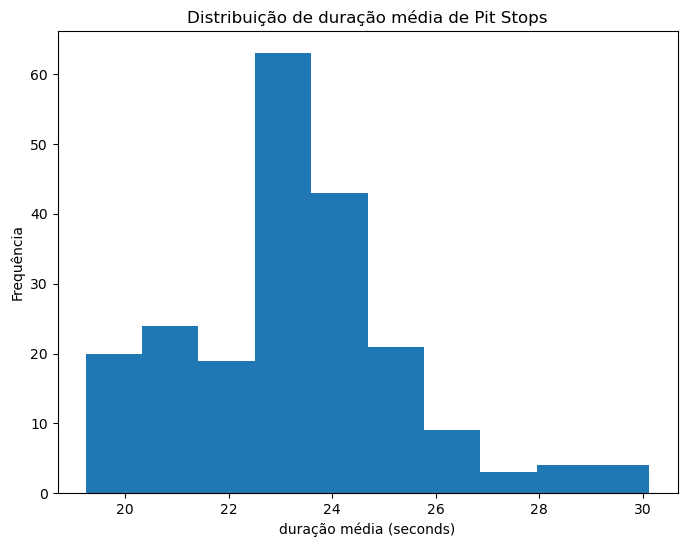

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(numerical_data[('duration', 'mean')], bins=10)
plt.xlabel('duração média (seconds)')
plt.ylabel('Frequência')
plt.title('Distribuição de duração média de Pit Stops')
plt.show()

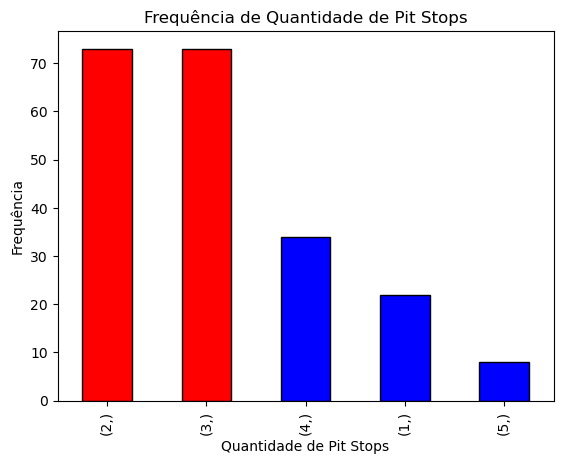

In [8]:
stops_count = numerical_data['stop'].value_counts()

colors = ['red' if i < 2 else 'blue' for i in range(len(stops_count))]

stops_count.plot(kind='bar', color=colors, edgecolor='black')

plt.xlabel('Quantidade de Pit Stops')
plt.ylabel('Frequência')
plt.title('Frequência de Quantidade de Pit Stops')
plt.show()

<p>Os Histogramas acima são representações das colunas 'duration' e 'stop', que significam o <strong>tempo médio de pitstop dos pilotos por corrida e a quantidade de pit_stops feita</strong>, respectivamente.</p>

<ul>
    <li>
        <p><strong>Sobre a 'duration':</strong> Percebe-se que o valor médio que mais se repete está entre 22 e 24 segundos.</p>       </li>
    <li>
        <p><strong>Sobre o 'stop:</strong> 2 e 3 são quantidades de pit stops mais comuns de acontecerem.</p>
    </li>
</ul>

<AxesSubplot:title={'center':'HeatMap'}, xlabel='None-None', ylabel='None-None'>

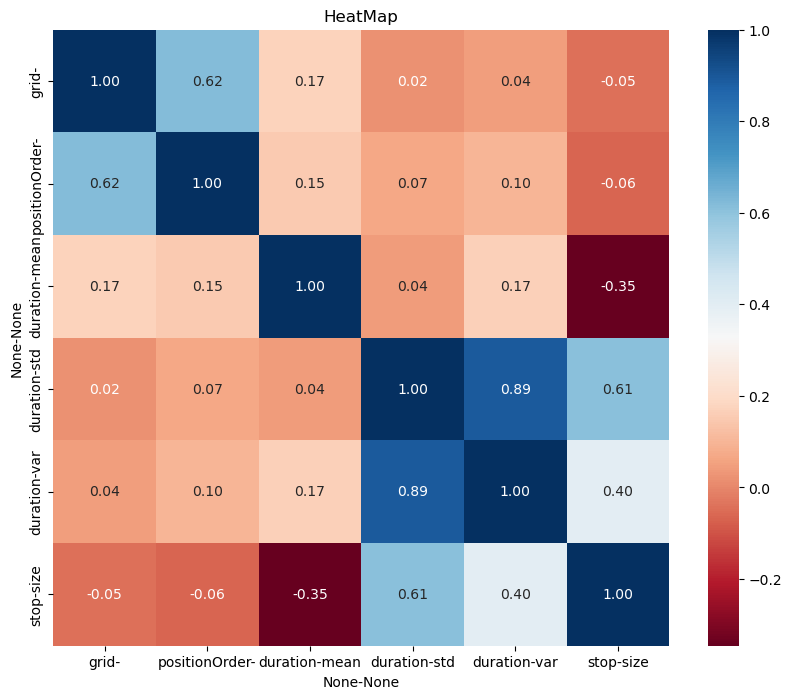

In [9]:
corr = numerical_data.corr()
corr

plt.figure(figsize=(10, 8))
plt.title('HeatMap')
sns.heatmap(data=corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

<h2>Através do mapa de calor, percebemos que o grid (posição de saída do piloto) é a variável que possui a maior relação com o positionOrder (posição final)</h2>

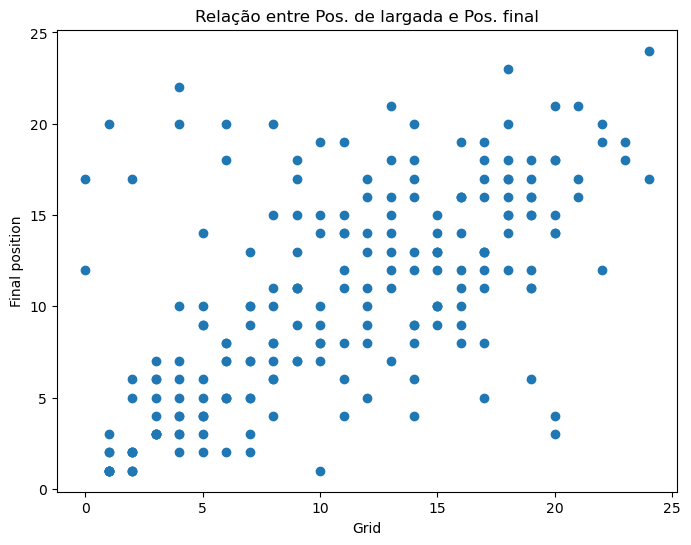

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(numerical_data['grid'], numerical_data['positionOrder'])
plt.xlabel('Grid')
plt.ylabel('Final position')
plt.title('Relação entre Pos. de largada e Pos. final')
plt.show()

<h3>Correlação positiva moderada/forte, com alguns outliers</h3>
<p>Com o gráfico, podemos notar que pode haver alguma relação entre as variáveis, porém de forma moderada/forte e com muitos outliers.</p>
<p>Portanto, estamos seguindo o raciocínio de que quanto menor a posição de largada do piloto, menos a posição final.</p>

<h1> Escolha do modelo de aprendizagem de máquina </h1>

<h2>Aprendizagem supervisionada</h2>
<p>
    Para o contexto do nosso projeto, em que o objetivo é prever o próximo campeão da Fórmula 1 com base em dados numéricos, a abordagem de <strong>aprendizagem supervisionada</strong> é mais adequada. A aprendizagem supervisionada envolve o treinamento de um modelo usando exemplos rotulados, em que as variáveis independentes (características) estão relacionadas com um rótulo conhecido (a posição final do piloto).
</p>
<p>
    A aprendizagem supervisionada é apropriada quando possuimos dados rotulados para treinar o modelo e um objetivo claro de prever um valor específico ou classe. Nesse caso, temos os dados históricos da Fórmula 1, incluindo as características dos pilotos e suas posições finais, permitindo o treinamento de um modelo para fazer previsões futuras com base nesses dados passados.
</p>

<br/>

<h2>Regresão Linear</h2>

<p>
    A <strong>Regressão Linear</strong> assume uma relação linear entre as variáveis independentes e dependentes.
</p>

<p>Escolhemos este modelo pois verificamos a existência de correlação alta entre variáveis do conjunto de dados (grid e positionOrder).</p>

In [42]:
# Criando dataframe X com colunas com mais correlação com a posição final
X = pd.DataFrame({
    'duration': numerical_data[('duration', 'mean')],
    'grid': numerical_data['grid']
})

# posição final - variável alvo (dependente)
y = numerical_data['positionOrder']

#  Dividindo os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# instância do modelo de LR
linearModel = LinearRegression()

# treinamento do modelo
linearModel.fit(X_train, y_train)

LinearRegression()

<p>RMSE (Root Mean Squared Error):
O RMSE é uma métrica que mede a diferença média entre os valores reais e os valores previstos pelo modelo. Ele calcula a raiz quadrada da média dos erros ao quadrado. Quanto menor o valor do RMSE, melhor o desempenho do modelo, indicando que as previsões estão mais próximas dos valores reais. O RMSE é expresso na mesma unidade da variável dependente.</p>

<p>
R2 (R-squared):
O R2 é uma métrica que indica a proporção da variabilidade da variável dependente (posição final) que é explicada pelo modelo. Ele varia de 0 a 1, sendo que um valor mais próximo de 1 indica um bom ajuste do modelo aos dados. O valor 1 significa que o modelo explica toda a variabilidade dos dados, enquanto o valor 0 indica que o modelo não explica nada da variabilidade. No entanto, é importante ressaltar que o R2 não indica se o modelo é adequado em termos de causalidade ou precisão das previsões.
</p>

In [51]:
# Fazendo previsões usando o conjunto de teste
y_pred = linearModel.predict(X_test)

# métricas de avaliação
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)

RMSE: 5.7464107863132865
R2: 0.16028338807805098


<p>
    RMSE: O valor do RMSE é de 5.746, o que significa que, em média, as previsões do modelo têm um desvio de aproximadamente 5.746 unidades em relação aos valores reais da variável dependente (posição final). Quanto menor o valor do RMSE, melhor o ajuste do modelo aos dados.

R2: O valor do R2 é de 0.160, o que indica que o modelo explica aproximadamente 16% da variabilidade da variável dependente (posição final). Isso significa que outras variáveis ou fatores não incluídos no modelo também estão influenciando a posição final dos pilotos.
<p>

In [53]:
# Obter os coeficientes estimados pela regressão linear
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linearModel.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

print(coefficients)

    Feature  Coefficient
1      grid     0.600806
0  duration     0.058498


<p>
    grid = 0.600806.
    Isto significa que um aumento de uma unidade na posição de largada está associado a um aumento de aproximadamente 0.6 unidades na posição final dos politos.
</p>

<p>
    duration = 0.058498.
    Isto significa que um aumento de uma unidade na duração média do pit_stop está associado a um aumento de aproximadamente 0.0585 unidades na posição final dos pilotos.
</p>

In [62]:
# AJUSTES NO MODELO